In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy import linalg
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

cite: https://www.youtube.com/watch?v=YHz0PHcuJnk

---
Create moons dataset

---

In [2]:
x,y=datasets.make_moons(n_samples=300, noise=.07)


<AxesSubplot:>

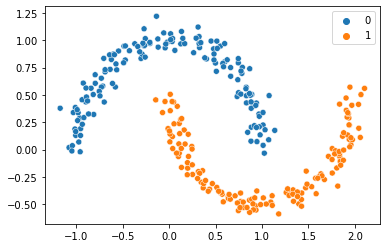

In [3]:
#plot the data
sns.scatterplot(x[:,0],x[:,1],hue=y)

---
try to cluster with k-means

---

In [4]:
kmean=KMeans(2,init='k-means++')
kmean_y=kmean.fit_predict(x)

<AxesSubplot:>

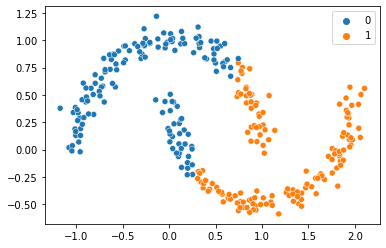

In [5]:
#plot after k-means
sns.scatterplot(x[:,0],x[:,1],hue=kmean_y)

In [ ]:
print('silhouette= ',silhouette_score(x, kmean_y, metric='euclidean'))
print('adjusted rand= ',adjusted_rand_score(y, kmean_y))

silhouette=  0.4954918578690671
adjusted rand=  0.25251842440819944


as we can see k-means suffers to cluster non flat data

---

---
spectral clustering is the technique that apply kernel or KNN to construct the affinity matrix, then apply k-means on the 'K' (number of clusters) eigen vectors from this matrix. 

---

In [27]:
        
def spectral_rbf(x,clusters=2,eta=1000):
    '''this function apply rbf kernel on data then apply k-means to cluster.
       input: data , number of clusters , eta hyperparameter.
       output: labels of trained data.
    '''
    k=np.exp(-eta*distance.cdist(x,x,metric='sqeuclidean'))
    d=k.sum(axis=1)
    D=np.sqrt(1/d)
    M=np.multiply(D.reshape(-1,x.shape[0]),np.multiply(k,D.reshape(x.shape[0],-1)))
    u,_,_=linalg.svd(M)
    sub_set=u[:,:clusters]
    model=KMeans(clusters,init='k-means++')
    return model.fit_predict(sub_set)

    

In [28]:
rbf_y=spectral_rbf(x,2)


<AxesSubplot:>

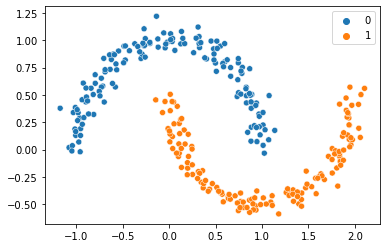

In [20]:
sns.scatterplot(x[:,0],x[:,1],hue=rbf_y)

In [10]:
print('silhouette= ',silhouette_score(x, rbf_y, metric='euclidean'))
print('adjusted rand= ',adjusted_rand_score(y, rbf_y))

silhouette=  0.32673394203695133
adjusted rand=  1.0


## try to use sklearn spectral clustering

In [11]:
sc = SpectralClustering(2,affinity='nearest_neighbors',assign_labels='kmeans',random_state=42,n_neighbors=9)
sk_y=sc.fit_predict(x)  

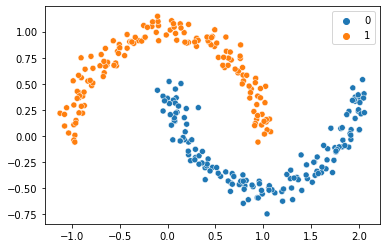

In [12]:
sns.scatterplot(x[:,0],x[:,1],hue=sk_y)

In [13]:
print('silhouette= ',silhouette_score(x, sk_y, metric='euclidean'))
print('adjusted rand= ',adjusted_rand_score(y, sk_y))

silhouette=  0.32673394203695133
adjusted rand=  1.0


**A bonus question**: is there a method in Scikit-Learn
other than Spectral Clustering - like the DBSCAN method which depends on
the Nearest Neighbour techniques or an Agglomerative method - that can
do this trick for you?

yes, there is many algorithms do this trick like ward and optics.

**OPTICS:** shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN.

**Ward:** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.